In [1]:
# 🔹 Always keep this at the top
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for graphs
sns.set_style('whitegrid')

# 🔹 Load the Titanic dataset
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 🔹 Basic info and missing values
print("Basic Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Stats:")
print(df.describe())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E

In [3]:
# 🔹 Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)


In [4]:
# 🔹 Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)


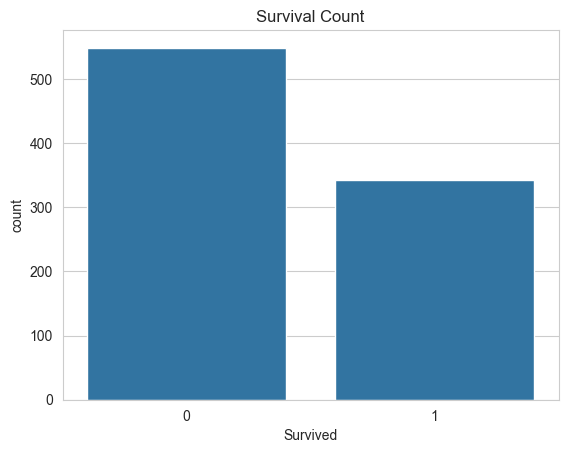

In [5]:
# 🔹 Plot 1: Survival Count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()


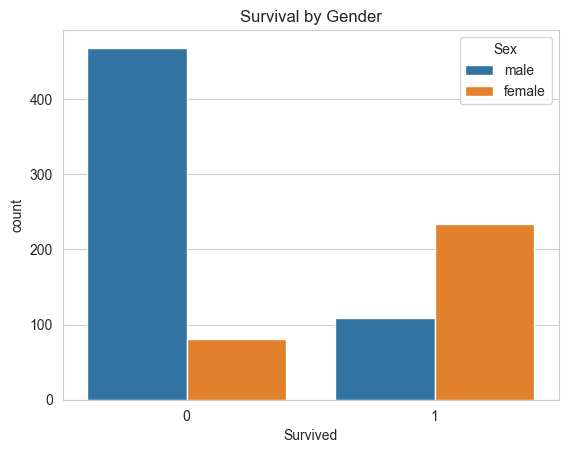

In [6]:
# 🔹 Plot 2: Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()


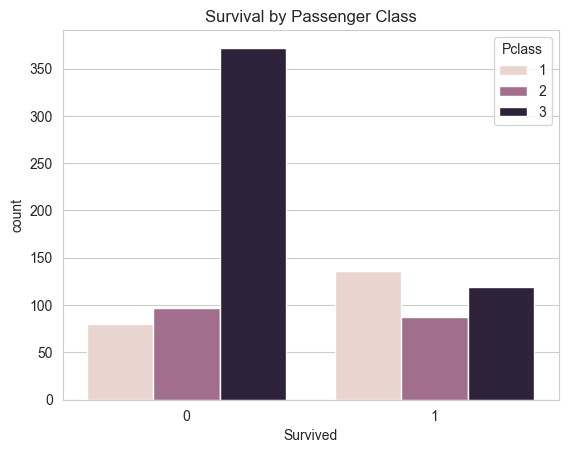

In [7]:
# 🔹 Plot 3: Survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()


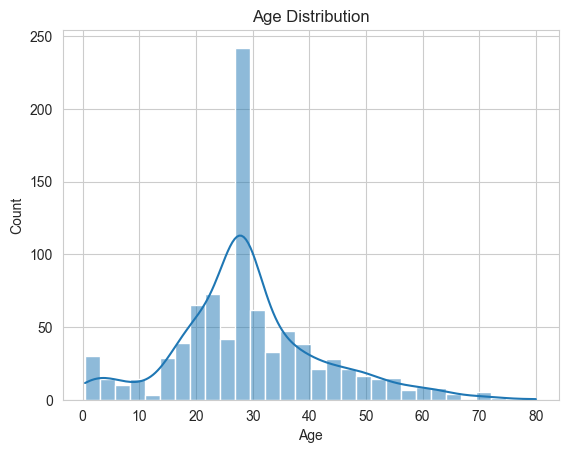

In [8]:
# 🔹 Plot 4: Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


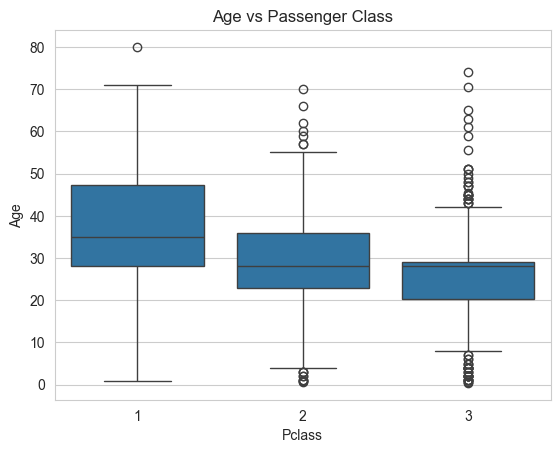

In [9]:
# 🔹 Plot 5: Boxplot - Age vs Pclass
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age vs Passenger Class')
plt.show()


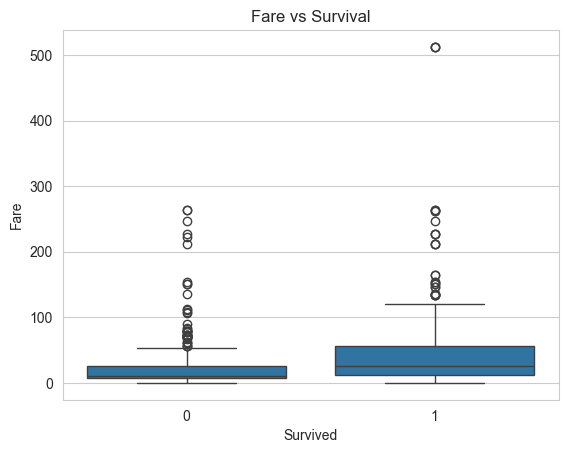

In [10]:
# 🔹 Plot 6: Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()


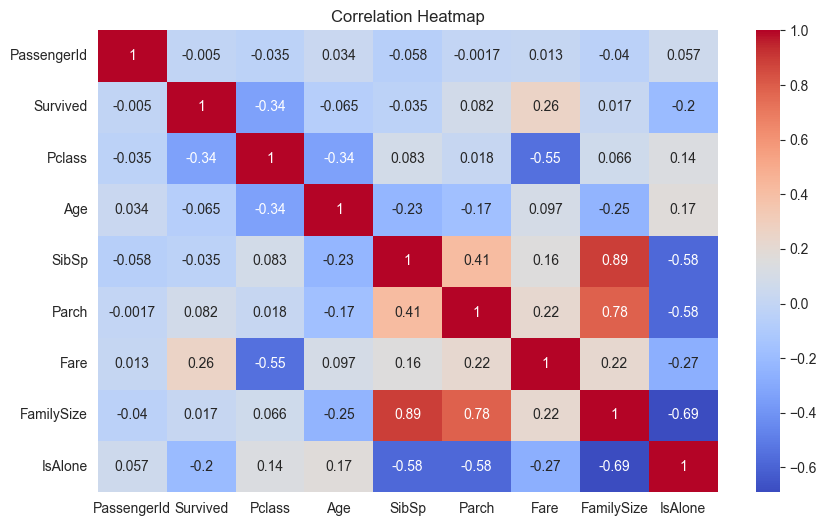

In [12]:
# ✅ Correlation Heatmap with numeric columns only
numeric_df = df.select_dtypes(include='number')  # keep only numeric columns
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
## Final Summary of Findings

- Females had a much higher survival rate than males.
- Passengers from Pclass 1 had the highest survival rate.
- Passengers who paid higher fares were more likely to survive.
- Most missing values were in the 'Cabin' column, so it was dropped.
- 'Age' had missing values and was filled with the median.
- Passengers with family had better survival than those traveling alone.
- Pclass and Fare showed correlation with survival.
